# Detecting Money Laundering Patterns Across Global Financial Transactions- ETL process

## Objectives

This project will explore a large dataset of 10,000 records, containing information on international  financial transactions. The dataset includes categorical and numerical information as it relates to each financial transaction including country of origin, the legality of the transaction, transaction amount, industry, number of shell companies involved in a transaction, tax haven of country and risk rating. 

The objective is to determine what variable or group of variables within the dataset will determine if the transaction is illegal. To do this, I will:

- Carry out a complete ETL (Extract, Transform, Load) process to clean and prepare the data.

- Run statistical tests to evaluate the four different hypothesis.

- Use these insights to suggest money laundering risk reduction strategies.



## Ethics and Data Privacy

All personal and identifiable information has been thoroughly removed from the dataset to ensure the privacy and confidentiality of individuals and institutions involved. Specifically:
1. **Personal Identifiers:** Names, contact details, account numbers, and any direct personal identifiers have been fully anonymised. For example, individual names have been replaced with generic labels such as Person 123.
Institutional Data: Identifiable information relating to financial institutions, such as bank names or branch identifiers, has also been anonymised, using placeholders like Bank 4833.

2. **Indirect Identifiers:** Care has been taken to avoid inclusion of any combinations of data that could potentially lead to re-identification of individuals or organisations, in accordance with established data protection and ethical research guidelines.

3. **Data Handling:** The data has been stored and handled securely throughout the project, and access has been restricted to authorised personnel only.
These steps have been implemented to ensure compliance with ethical research standards and data protection regulations, including GDPR (where applicable), and to respect the privacy of all parties involved.

---

1. **Import Required Libraries**

I will begin by importing the necessary Python libraries for data handling and exploration.

In [24]:
import pandas as pd
import numpy as np
import os

# Step 0. Move up one directory level to where the dataset file is located, enabling pandas to find and load the CSV successfully
print(os.getcwd())

/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/jupyter_notebooks


2. **Load the Dataset**

I will load the CSV file named Money_Laundering_Dataset.csv from the local directory.

In [23]:
#Step 1. Load the dataset
data = pd.read_csv('/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/data/money_ laundering_dataset.csv')

#Step 2. show the first few rows of the dataset
data.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [25]:
# Step 3. Display summary of dataset structure, including column names, non-null counts, and data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

3. **Clean the Dataset**

I will check for irregularities across the dataset which may hinder further analysis i.e spelling mistakes and duplication. Moneytary values will be brought down to 0 decimal places, due to the large sums of money involved. 

In [3]:
# Step 4. Drop columns that are not needed for analysis
data.drop(columns=['Transaction ID'], inplace=True)

In [4]:
# Step 5. Check for duplicate values in 'Person Involved' column
print(data['Person Involved'].duplicated().sum())

3680


In [5]:
print(data['Person Involved'].unique())

['Person_1101' 'Person_7484' 'Person_3655' ... 'Person_6348' 'Person_4171'
 'Person_3267']


Initially, I considered removing the `'Person Involved'` column because it contains coded identifiers. However, after discovering that there are 3,680 duplicate entries, it’s clear that this column provides valuable information for analysis. These repeated entries can help identify individuals involved in multiple transactions, which is important for detecting suspicious patterns or behaviors.

In [6]:
# Step 6. Check for duplicate values in 'Financial Institution' column
print(data['Financial Institution'].duplicated().sum())
data['Financial Institution'].value_counts()

9501


Financial Institution
Bank_81     36
Bank_260    36
Bank_100    35
Bank_120    34
Bank_438    33
            ..
Bank_199    11
Bank_169    11
Bank_269    11
Bank_249     9
Bank_133     9
Name: count, Length: 499, dtype: int64

The exploration above shows that there is repetition in the `'Financial Institution`' involved, with some banks appearing significantly more often than others. Therefore, I will retain this column to further analyze whether there is any correlation between the financial institution and the legality of the transactions.

In [7]:
#Step 7. Check for irregularies in 'Industry' column
print(data['Industry'].unique())

['Construction' 'Luxury Goods' 'Oil & Gas' 'Real Estate' 'Arms Trade'
 'Casinos' 'Finance']


`'Industry`' column contains seven industries and no irregularities in the data. 

In [8]:
#Step 8. Check for irregularities in remaining columns 
print(data['Reported by Authority'].unique())
print(data['Source of Money'].unique())
print(data['Destination Country'].unique())
print(data['Tax Haven Country'].unique())
 

[ True False]
['Illegal' 'Legal']
['USA' 'South Africa' 'Switzerland' 'Russia' 'Brazil' 'UK' 'India' 'China'
 'Singapore' 'UAE']
['Singapore' 'Bahamas' 'Switzerland' 'Panama' 'Luxembourg'
 'Cayman Islands']


The remaining columns in the dataset do not show any irregularities in their entries. There are a total of 10 countries where the source of money originates and six tax haven countries. Overall, the data quality in these columns appears to be good.

In [9]:
# Step 9. Change the monetary values to 0 decimal places
data['Amount (USD)'] = data['Amount (USD)'].round(0)
print(data['Amount (USD)'].head())
  

0    3267530.0
1    4965767.0
2      94168.0
3     386420.0
4     643378.0
Name: Amount (USD), dtype: float64


4. **Time Shift data**

The `Date of Transaction` in the dataset range from 2013 onwards. For the purpose of this analysis, the dates have been shifted forward by 10 years to align with the current timeline (2023 and beyond). This adjustment helps in contextualizing the data to present-day conditions without altering the relative timing of transactions, allowing for more relevant insights while maintaining data integrity.

In [28]:
# Step 10. Shift the date forward by 10 years, add ten years to the existing 'Date of Transaction' column
data['Date of Transaction'] = data['Date of Transaction'].apply(lambda x: x + relativedelta(years=10))

# Step 11. Preview to show updated 'Date of Transaction' column
print(data['Date of Trasaction'].head())

NameError: name 'relativedelta' is not defined

Upon reviewing the dataset, I found that only three out of ten columns contain numerical data, while the rest are categorical. A large portion of categorical data makes it more difficult to visualize and uncover meaningful patterns. Therefore, I will convert some of these categorical columns into numerical or binary features, making the data easier to analyze and more suitable for visualisation and pattern detection. 

In [26]:
# Step 12. Check for unique values in categorical columns
print(data['Country'].unique())
print(data['Destination Country'].unique())

['Brazil' 'China' 'UK' 'UAE' 'South Africa' 'Russia' 'Switzerland' 'India'
 'USA' 'Singapore']
['USA' 'South Africa' 'Switzerland' 'Russia' 'Brazil' 'UK' 'India' 'China'
 'Singapore' 'UAE']


There are 10 unique values in both the Country and Destination Country columns. There is overlap between the two columns, meaning some transactions may remain within the same country — whether legal or illegal. To enable clearer analysis in Tableau, especially for identifying cross-border risks and country-type behavior, I will create three engineered categorical columns:

1. **Number of Shell Companies Involved**  creating a column `Shell Cat` Additional column for the number of shell companies involved. Defining two categories, Transactions which involve less that three shell companies and transactions that involve more than three shell companies, grouping all transactions from 3-10 in one single bin. 


1. **Transaction Type: Domestic vs Cross-Border**
Purpose: Quickly identifies if a transaction stays within the same country or goes across borders.
Method: Compare Country with Destination Country.

2. **Origin Country Category (Income & Regulation Bins)**
Based on UN classifications, World Bank income levels, and FATF regulatory status, countries can be grouped into three bins:
Country	Origin Country Bin
Brazil	Upper-Middle Income / Moderate Regulation
China	Upper-Middle Income / Strict Regulation
UK	High Income / Strong Regulation
UAE	High Income / Low Transparency / Risk Zone
South Africa	Upper-Middle Income / Moderate Regulation
Russia	High Income / High Risk
Switzerland	High Income / Strong Regulation
India	Lower-Middle Income / Developing
USA	High Income / Strong Regulation
Singapore	High Income / Tax Haven / Risk Zone

3. **Destination Country Category (Mapped)**

| Destination Country | Income Level        | Regulation / Transparency                | Risk Level    | **Mapped Category**                            |
| ------------------- | ------------------- | ---------------------------------------- | ------------- | ---------------------------------------------- |
| **USA**             | High Income         | Strong AML Regulation                    | Low to Medium | High Income / Strong Regulation                |
| **UK**              | High Income         | Strong AML Regulation                    | Low           | High Income / Strong Regulation                |
| **Switzerland**     | High Income         | Strong AML Regulation (but secrecy laws) | Medium        | High Income / Strong Regulation / Secrecy Risk |
| **Singapore**       | High Income         | High Regulation but Known Secrecy        | Medium        | High Income / Tax Haven / Medium Risk          |
| **Russia**          | High Income         | Weak AML Controls, Sanctions             | High          | High Income / Weak Regulation / High Risk      |
| **UAE**             | High Income         | Low Transparency, Emerging Compliance    | High          | High Income / Low Regulation / High Risk       |
| **China**           | Upper-Middle Income | Moderate Regulation                      | Medium        | Upper-Middle Income / Medium Regulation        |
| **Brazil**          | Upper-Middle Income | Moderate Regulation                      | Medium        | Upper-Middle Income / Moderate Regulation      |
| **South Africa**    | Upper-Middle Income | Improving AML Framework                  | Medium        | Upper-Middle Income / Moderate Regulation      |
| **India**           | Lower-Middle Income | Developing AML Systems                   | Medium        | Lower-Middle Income / Developing Regulation    |




---

## Initial Analysis 

This analysis begins with basic descriptive statistics — specifically, the mean, median, and mode of the numerical columns — to uncover initial patterns in the dataset.

In [11]:
# Step 12. Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


# Step 13. Select numeric + boolean columns
numeric_cols = data.select_dtypes(include=['float64', 'int64', 'bool']).columns

# Step 14. Create stats DataFrame
stats = pd.DataFrame(index=numeric_cols, columns=[
    'mean', 'median', 'mode', 'min', 'max', 'std',
    '25%', '50%', '75%', 'skewness', 'kurtosis',])

# Step 15. Loop through each column
for col in numeric_cols:
    col_data = data[col]
    
    stats.loc[col, 'mean'] = col_data.mean()
    stats.loc[col, 'median'] = col_data.median()
    stats.loc[col, 'mode'] = col_data.mode().iloc[0] if not col_data.mode().empty else None
    stats.loc[col, 'min'] = col_data.min()
    stats.loc[col, 'max'] = col_data.max()

    # Step 16. Skip quantiles and advanced stats for booleans
    if col_data.dtype != 'bool':
        stats.loc[col, 'std'] = col_data.std()
        stats.loc[col, '25%'] = col_data.quantile(0.25)
        stats.loc[col, '50%'] = col_data.quantile(0.50)
        stats.loc[col, '75%'] = col_data.quantile(0.75)
        stats.loc[col, 'skewness'] = col_data.skew()
        stats.loc[col, 'kurtosis'] = col_data.kurtosis()

# Step 17. Display nicely
display(stats.round(2))

,mean,median,mode,min,max,std,25%,50%,75%,skewness,kurtosis
Amount (USD),2501817.6671,2501310.5,2655927.0,10032.0,4999812.0,1424364.278361,1279005.25,2501310.5,3722416.75,0.011124,-1.172878
Reported by Authority,0.2005,0.0,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN
Money Laundering Risk Score,5.5264,6.0,9,1,10,2.893603,3.0,6.0,8.0,-0.011003,-1.243735
Shell Companies Involved,4.4694,4.0,0,0,9,2.879773,2.0,4.0,7.0,0.005806,-1.22295



The Initial analysis of the data shows:

`Amount (USD)`

* **Mean**: 2,501,817. On average, transactions involve about \$2.5 million.
* **Median**: 2,501,310. The middle transaction amount is also about \$2.5 million, very close to the mean, so the distribution might be roughly symmetric.
* **Mode**: 2,655,927. The most common transaction amount is about \$2.65 million.
* **Max**: 4,999,812. The largest transaction is nearly \$5 million.
* **Standard Deviation**: 1,424,364. There is a high spread in transaction amounts, but because mean ≈ median, it suggests the spread isn't caused by strong outliers.
* **25%**: 1,279,005.25 — 25% of all transactions fall below this amount. This shows what a “low-end” transaction looks like within the dataset.
* **50%**: 2,501,310.50 — This is the **median**, meaning half the transactions are below this value and half are above. It's useful for understanding the "typical" transaction.
* **75%**: 3,722,416.75 — 75% of transactions are below this amount, and 25% are above. This highlights what a relatively **large** transaction looks like within the context of the data.
* **Skewness**: \~0.01. The distribution is nearly symmetrical.
* **Kurtosis**: -1.17. The distribution is flatter than normal, meaning fewer extreme outliers than expected in a bell curve.

---

`Reported by Authority` (Boolean: True = reported, False = not)

* **Mean**: 0.2005. About **20%** of transactions were reported by authorities.
* **Median**: 0.0. More than half of the transactions were **not reported**.
* **Mode**: False. The most common value is **False**, confirming most cases are unreported.
* **Max**: True. Some transactions were reported.
* **Standard Deviation**: 0.400. Reflects a mix of True and False values, but skewed toward False.
* **25%**: 0.0 — At least 25% of the values are definitely unreported.
* **50%**: 0.0 — The median again confirms that at least half are unreported.
* **75%**: 0.0 — Even 75% of the values are False (not reported), which shows that only a small minority were flagged by authorities.
* **Skewness**: 1.50. Strong **right skew** — very few 1s (True values).
* **Kurtosis**: 0.24. Slightly peaked compared to a normal distribution.

**Conclusion**: Most transactions go unreported; this variable could help flag rare, suspicious activity.

---

`Money Laundering Risk Score` (0–10 scale)

* **Mean**: \~5.53. Average risk score is around 5.5.
* **Median**: 6. Half the transactions have a score below 6, half above.
* **Mode**: 9. Most common score is **9**, suggesting many high-risk transactions.
* **Max**: 10. Some transactions score the maximum risk.
* **Standard Deviation**: 2.89. There's a reasonable spread of scores.
* **25%**: 3.0 — One-quarter of transactions are low-risk (below 3).
* **50%**: 6.0 — The median; half of all transactions score below 6, half above.
* **75%**: 8.0 — 25% of transactions have risk scores **higher than 8**, indicating a significant tail of high-risk activity.
* **Skewness**: \~-0.01. Very slight **left skew**, almost symmetric.
* **Kurtosis**: -1.24. Flatter distribution — values more evenly spread than a bell curve.

---

`Shell Companies Involved` (0–9)

* **Mean**: \~4.47. On average, \~4.5 shell companies are involved per transaction.
* **Median**: 4. Half of transactions involve **4 or fewer** shell companies.
* **Mode**: 0. Many transactions involve **no** shell companies at all.
* **Max**: 9. Some transactions involve up to **9** shell companies.
* **Standard Deviation**: 2.88. Moderate variability in number of shell companies involved.
* **25%**: 2.0 — A quarter of transactions involve 2 or fewer shell companies.
* **50%**: 4.0 — The median; half of all transactions involve fewer than 4 shell companies.
* **75%**: 7.0 — A quarter of all transactions involve 7 or more shell companies — potentially suspicious activity.
* **Skewness**: \~0.01. Almost symmetrical distribution.
* **Kurtosis**: -1.22. Flat distribution with fewer outliers.

---

Next I will visualise the distribution for the four numerical columns.

We will plot the data to check the distribution. 

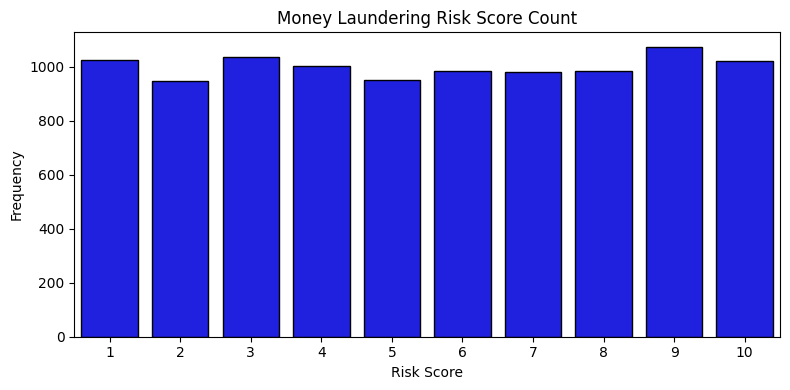

In [12]:
# Step 18. Create a histogram for 'Amount (USD)' to visualize the distribution of transaction amounts
plt.figure(figsize=(8, 4))
sns.countplot(x='Money Laundering Risk Score', data=data, color='blue', edgecolor='black')
plt.title("Money Laundering Risk Score Count")
plt.ylabel("Frequency")
plt.xlabel("Risk Score")
plt.tight_layout()
plt.show()

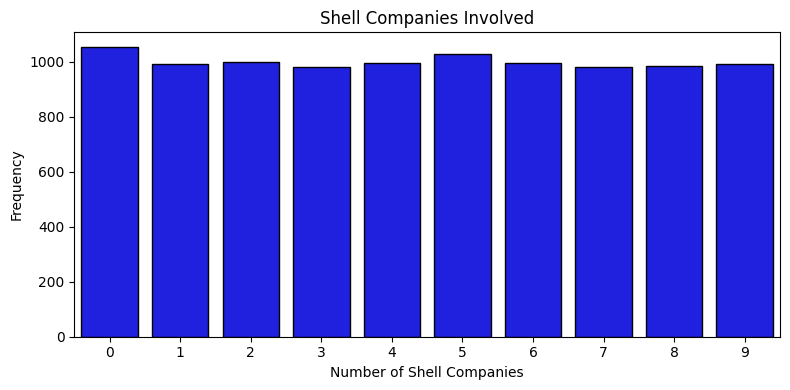

In [24]:
# Step 19. Create a histogram for 'Shell Companies Involved' to visualize the distribution of shell companies
plt.figure(figsize=(8, 4))
sns.countplot(x='Shell Companies Involved', data=data, color='blue', edgecolor='black')
plt.title("Shell Companies Involved")
plt.ylabel("Frequency")
plt.xlabel("Number of Shell Companies")
plt.tight_layout()
plt.show()

In [13]:
#Step 20. Calculate the standard deviation for 'Amount (USD)'
std_amount = data['Amount (USD)'].std()
print(f"Standard Deviation for Amount (USD): ${std_amount:,.2f}")

Standard Deviation for Amount (USD): $1,424,364.28


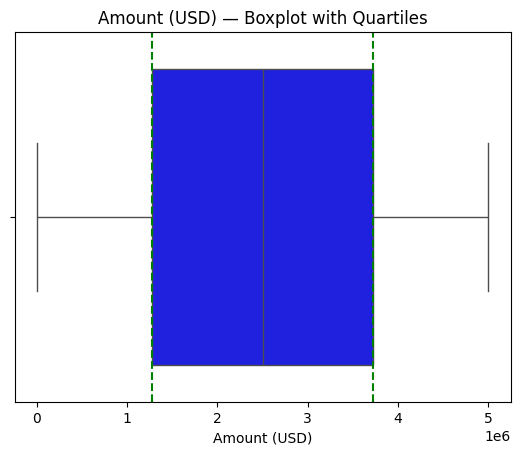

In [14]:
#Step 21. Create a boxplot for 'Amount (USD)' to visualize the distribution of transaction amounts
sns.boxplot(x=data['Amount (USD)'], color='blue')

q1 = data['Amount (USD)'].quantile(0.25)
q3 = data['Amount (USD)'].quantile(0.75)

plt.axvline(q1, color='green', linestyle='--')
plt.axvline(q3, color='green', linestyle='--')

plt.title('Amount (USD) — Boxplot with Quartiles')
plt.xlabel('Amount (USD)')

plt.show()

This box plot shows that the mid point for most transactions is $2.5million, most transactions cluster around $1.5m and $3.75m. There are no extreme outliers beyond $5m and there can't be a transaction which is less than $0. 

In [15]:
#Step 22. Calculate the mean Money Laundering Risk Score by Industry
data.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values()

Industry
Luxury Goods    5.373544
Oil & Gas       5.427843
Real Estate     5.455301
Casinos         5.556282
Arms Trade      5.570721
Construction    5.583562
Finance         5.711864
Name: Money Laundering Risk Score, dtype: float64

Bearing in mind the `Money Laundering Risk Score`range from 1-9 inclusive, there isn't a great deal of difference between the low and the highest score.

---

## Advanced Analysis 

We will do a Pearson Correlation Analysis, to see if two variables move together. This will help you quantify the relationship between numerical variables, such as:
- `Amount (USD)` and `Money Laundering Risk Score`
- `Shell Companies Involved` and `Risk Score`
- `Amount (USD)` and `Shell Companies Involved`

In [16]:
# Step 23.Only include numerical columns
numerical_cols = ['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']

# Step 24. Compute correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Step 25. Display it
print(correlation_matrix)

                             Amount (USD)  Money Laundering Risk Score  \
Amount (USD)                     1.000000                     0.016529   
Money Laundering Risk Score      0.016529                     1.000000   
Shell Companies Involved        -0.017905                    -0.019262   

                             Shell Companies Involved  
Amount (USD)                                -0.017905  
Money Laundering Risk Score                 -0.019262  
Shell Companies Involved                     1.000000  


### Correlation Summary of Numerical Variables


| Variable Pair                            | Correlation Coefficient | Interpretation |
|------------------------------------------|--------------------------|----------------|
| Amount (USD) & Risk Score                | 0.0165                   | Very weak positive correlation – almost no relationship |
| Amount (USD) & Shell Companies Involved  | -0.0179                  | Very weak negative correlation – almost no relationship |
| Risk Score & Shell Companies Involved    | -0.0193                  | Very weak negative correlation – almost no relationship |

These results indicate that there is **no meaningful linear relationship** between these variables. For instance, larger transaction amounts are **not necessarily** associated with higher risk scores or more shell companies. This suggests that the `Money Laundering Risk Score` may be influenced more by other factors, such as `Industry`, `Country`, or whether the transaction was `Reported by Authority`.


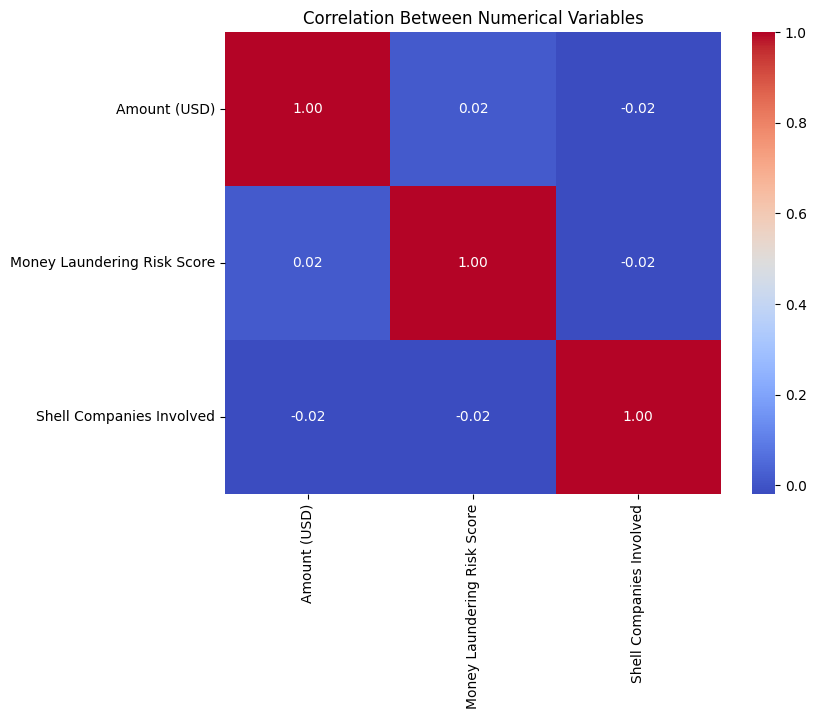

In [17]:
# Step 26. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Variables")
plt.show()

In order to calculate the relationships with categorical data, we'll explore the Chi Squared test, 
which is a statistical method used to determine if there is a significant association between two categorical 
variables. This test will help us understand if the distribution of one categorical variable differs significantly across the levels of another categorical variable.

In [21]:
from scipy.stats import chi2_contingency

# Example: Chi-squared test between 'Industry' and 'Reported by Authority'
cat1 = 'Industry'
cat2 = 'Reported by Authority'

# Create a contingency table
contingency_table = pd.crosstab(data[cat1], data[cat2])

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

Chi-squared statistic: 12.7965
Degrees of freedom: 6
P-value: 0.04638317224472215


Here the chi-Squared test assesses the relationship between `Industry` and `Reported by Authority`. The result are statistically significant (χ² = 12.80, df = 6, p = 0.046), suggesting a potential association between the variables. However, since the p-value is close to 0.05, the evidence is weak indicating meaning it should be intrepreted with caution. 

In [22]:
# Example: Chi-squared test between 'Transaction Type' and 'Amount (USD)' - Hypothesis Two 

data['Shell_Cat'] = data['Shell Companies Involved'].apply(lambda x: '3 or more' if x >= 3 else 'Less than 3')

cat1 = 'Shell_Cat'
cat2 = 'Reported by Authority'

# Create a contingency table
contingency_table = pd.crosstab(data[cat1], data[cat2])

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

Chi-squared statistic: 3.5725
Degrees of freedom: 1
P-value: 0.05874435676800048


In [51]:
# Example: Chi-squared test between 'Transaction Type' and 'Amount (USD)' - Hypothesis Three 
cat1 = 'Transaction Type'
cat2 = 'Tax Haven Country'

# Create a contingency table
contingency_table = pd.crosstab(data[cat1], data[cat2])

# Run the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

Chi-squared statistic: 41.2689
Degrees of freedom: 20
P-value: 0.0034399538602876483


save new clean dataset to my local drive. 

In [19]:
data.to_csv('/Users/nataliewaugh/Documents/DataCode/Detecting_Money_Laundering_Patterns-/data/Cleaned_Money_Laundering_Dataset.csv', index=False)